# CNN model to detect wheat diseases

## Pre-requisites

### Importing libraries

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

### Setting the paths of the dataset and images to be classified

In [2]:
dataset_path = 'cropDiseaseDataset'
klass_dir = 'testCDD'

### Setting the parameters 

In [3]:
img_size = 64
num_classes = 4
batch_size = 32

### Creating the image and the labels

In [5]:
from sklearn.preprocessing import LabelBinarizer

def load_dataset():
    images = []
    labels = []
    classes = os.listdir(dataset_path)
    label_binarizer = LabelBinarizer()
    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):  # Check if the current item is a directory
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                try:
                    image = cv2.imread(image_path)
                    if image is not None:  # Check if the image was loaded successfully
                        image = cv2.resize(image, (img_size, img_size))
                        images.append(image)
                        labels.append(class_name)
                    else:
                        print(f"Skipping invalid image: {image_path}")
                except Exception as e:
                    print(f"Error loading image: {image_path}")
                    print(str(e))
    # Convert labels to unique binary arrays
    labels = label_binarizer.fit_transform(labels)
    return images, labels

Images that are not in the correct format are skipped.

In [6]:
images, labels = load_dataset()

Skipping invalid image: cropDiseaseDataset\Wheat_crown_root_rot\00421.gif
Skipping invalid image: cropDiseaseDataset\Wheat_crown_root_rot\00431.gif
Skipping invalid image: cropDiseaseDataset\Wheat_crown_root_rot\00511.gif
Skipping invalid image: cropDiseaseDataset\Wheat_crown_root_rot\00531.gif
Skipping invalid image: cropDiseaseDataset\Wheat_crown_root_rot\00541.gif
Skipping invalid image: cropDiseaseDataset\Wheat_crown_root_rot\00571.gif
Skipping invalid image: cropDiseaseDataset\Wheat_crown_root_rot\03681.gif
Skipping invalid image: cropDiseaseDataset\Wheat_crown_root_rot\07071.gif
Skipping invalid image: cropDiseaseDataset\Wheat_Leaf_Rust\07361.gif
Skipping invalid image: cropDiseaseDataset\Wheat_Loose_Smut\0121.gif
Skipping invalid image: cropDiseaseDataset\Wheat_Loose_Smut\0131.gif
Skipping invalid image: cropDiseaseDataset\Wheat_Loose_Smut\0191.gif
Skipping invalid image: cropDiseaseDataset\Wheat_Loose_Smut\3181.gif
Skipping invalid image: cropDiseaseDataset\Wheat_Loose_Smut\319

The arrays assigned for the 4 labels are as follows:
Crown root rot - 0010, Healthy - 0001, Leaf rust - 1000, Loose smut - 0100

In [7]:
#Crown root rot - 0010, Healthy - 0001, Leaf rust - 1000, Loose smut - 0100
for i in labels:
    print(i)

[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]


### Preprocessing the dataset

In [8]:
def preprocess_dataset(images, labels):
    images = np.array(images)
    images = images.astype('float32') / 255.0
    labels = np.array(labels)
    return images, labels

In [9]:
images, labels = preprocess_dataset(images, labels)

The labels after preprocessing are stored as a NumPy array

In [10]:
print(labels)

[[0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 ...
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]]


## Creating the Convolutional Neural Network (CNN)

### Splitting the data into a training and testing set 

In [11]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

### Creating the CNN model

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

### Compiling the CNN model

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Augmenting the training data 

In [14]:
data_generator = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_generator.fit(train_images)

### Training the model with the training data

The history variable stores the values of accuracy and loss after each epoch, which are then used to plot the graph

In [15]:
history = model.fit(data_generator.flow(train_images, train_labels, batch_size=batch_size), steps_per_epoch=len(train_images) // batch_size, epochs=30)

Epoch 1/30


84/84 [==============================] - 4s 41ms/step - loss: 1.0815 - accuracy: 0.5120
Epoch 2/30
84/84 [==============================] - 3s 41ms/step - loss: 0.9975 - accuracy: 0.5876
Epoch 3/30
84/84 [==============================] - 4s 43ms/step - loss: 0.9330 - accuracy: 0.6109
Epoch 4/30
84/84 [==============================] - 4s 44ms/step - loss: 0.8941 - accuracy: 0.6316
Epoch 5/30
84/84 [==============================] - 4s 43ms/step - loss: 0.8668 - accuracy: 0.6523
Epoch 6/30
84/84 [==============================] - 3s 41ms/step - loss: 0.8480 - accuracy: 0.6632
Epoch 7/30
84/84 [==============================] - 4s 42ms/step - loss: 0.8699 - accuracy: 0.6447
Epoch 8/30
84/84 [==============================] - 4s 41ms/step - loss: 0.8542 - accuracy: 0.6474
Epoch 9/30
84/84 [==============================] - 3s 41ms/step - loss: 0.8186 - accuracy: 0.6602
Epoch 10/30
84/84 [==============================] - 4s 42ms/step - loss: 0.7747 - accuracy: 0.6902
Epoch 1

### The graphs of accuracy and loss after each epoch are plotted

These graphs show a logarithmic trend

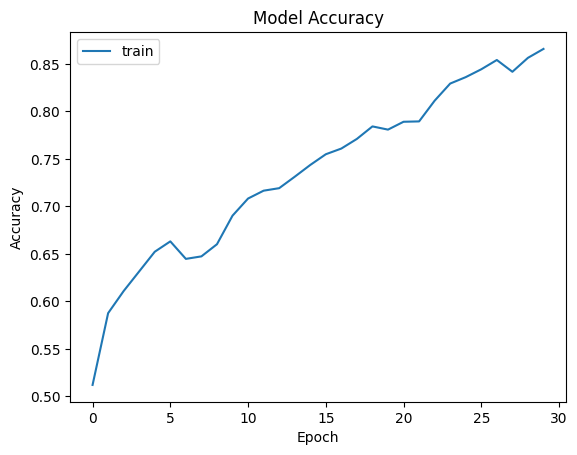

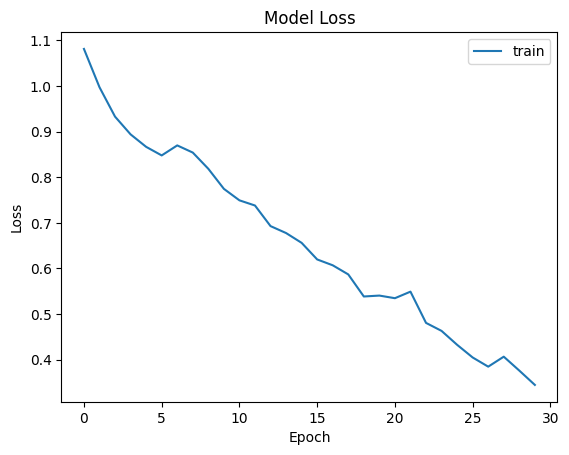

In [16]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

### Evaluating the model

The model's loss and accuracy is evaluted against the test data

In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

22/22 [==============================] - 0s 11ms/step - loss: 0.6169 - accuracy: 0.8205
Test Loss: 0.6169487237930298
Test Accuracy: 0.8204748034477234


A testing accuracy of 83% indicates that the model is accurate

## Classifying images 

### Initializing the arrays

In [18]:
images_to_be_classified = os.listdir(klass_dir)
resized_images = []

### Preprocessing the images

This is done to make the images compatible with the model, as it can function accurately only if a particular format of images is used

In [19]:
for image_name in images_to_be_classified:
    # Construct the full path to the image
    image_path = os.path.join(klass_dir, image_name)
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    # Resize the image
    resized_image = cv2.resize(image, (img_size, img_size))
    # Append the resized image to the list
    resized_images.append(resized_image)

In [20]:
resized_images = np.array(resized_images)

In [21]:
resized_images = resized_images / 255.0

### Predicting image labels

In [23]:
predictions = model.predict(resized_images)

1/1 [==============================] - 0s 86ms/step


### Printing image names along with their corresponding labels

The labels with their corresponding arrays are as follows:
Crown root rot - 0010, Healthy - 0001, Leaf rust - 1000, Loose smut - 0100

In [24]:
for i in range(len(images_to_be_classified)):
    image_name = images_to_be_classified[i]
    prediction = predictions[i]
    rounded_prediction = (np.round(prediction))
    print("Image:", image_name, "Predicted Label:", rounded_prediction)

Image: crr_1.jpg Predicted Label: [0. 0. 0. 1.]
Image: crr_2.jpg Predicted Label: [0. 0. 0. 0.]
Image: h_1.jpg Predicted Label: [0. 0. 0. 1.]
Image: h_2.jpg Predicted Label: [0. 0. 0. 1.]
Image: lr_1.jpg Predicted Label: [0. 0. 1. 0.]
Image: lr_2.jpg Predicted Label: [0. 0. 1. 0.]
Image: ls_1.jpg Predicted Label: [0. 1. 0. 0.]
Image: ls_2.jpg Predicted Label: [0. 1. 0. 0.]


It is observed that out of the 8 images, 6 images are correctly identified.

### Saving the model

The model is saved as an H5 file. This format is used as both weights and model configuration can be stored in the same file.

In [25]:
model.save('wheatDiseaseModel.h5')

C:\Users\abdal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
